# Master MIND - IDLE

# Entraînement en PyTorch

------------------------------------------------------------------------

**Remarque:** Si vous arrivez ici sans avoir lu les instructions
d’installation sur la page du cours, ça ne va pas marcher. Goto
<https://schwander.isir.upmc.fr/enseignement/m1mind_idle/> dans ce cas.

# Exercice 1 - *Dataset* *personnalisé*

Pour se compliquer la vie, on va faire l’apprentissage sur un dataset
qui n’est pas disponible directement dans PyTorch. Il s’agit
d’[USPS](https://www.openml.org/search?type=data&sort=runs&id=41070&status=active),
un petit dataset de chiffres manuscrits avec des images $16 \times 16$.
On a seulement 9000 images, c’est donc beaucoup plus facile à gérer que
MNIST.

## Question 1 - *Exploration* *préliminaire*

Avec le module `pandas` ou `polars`, analyser rapidement le contenu du
dataset.

In [ ]:
# Alan Tambellini 21203966


from scipy.io import arff
import pandas as pd

arff_file = arff.loadarff('usps.arff')
df = pd.DataFrame(arff_file[0])



In [6]:
df.head() #the first column is the label/number and the rest are the pixels

,int0,double1,double2,double3,double4,double5,double6,double7,double8,double9,...,double247,double248,double249,double250,double251,double252,double253,double254,double255,double256
0,7.0,-1.000000,-1.000000,-1.000000,-0.999997,-0.999729,-0.989537,-0.860165,-0.395924,0.048299,...,0.131298,0.384728,0.433073,0.193397,-0.237439,-0.649848,-0.906359,-0.988672,-0.999475,-0.999994
1,6.0,-0.999927,-0.993644,-0.900309,-0.632621,-0.443145,-0.454436,-0.474872,-0.431176,-0.494539,...,-0.388084,-0.273639,0.001094,0.294825,0.316915,0.113494,-0.092331,-0.329390,-0.584681,-0.868793
2,5.0,-1.000000,-1.000000,-1.000000,-0.999995,-0.999986,-0.999987,-0.999990,-0.999316,-0.976299,...,-0.999778,-0.988816,-0.821857,-0.277379,0.136501,-0.247816,-0.809498,-0.988116,-0.999864,-1.000000
3,8.0,-0.999998,-0.999800,-0.994136,-0.932288,-0.673685,-0.192056,0.218820,0.337224,0.193371,...,-0.373861,0.196530,0.002823,-0.695900,-0.976372,-0.999458,-0.999996,-1.000000,-1.000000,-1.000000
4,4.0,-1.000000,-0.999971,-0.997452,-0.957499,-0.801681,-0.510623,-0.107965,0.217262,0.216431,...,0.214362,0.339240,0.458489,0.473456,0.372240,0.173322,-0.144182,-0.542254,-0.863031,-0.981978


In [7]:
df.describe()

,int0,double1,double2,double3,double4,double5,double6,double7,double8,double9,...,double247,double248,double249,double250,double251,double252,double253,double254,double255,double256
count,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,...,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000
mean,4.892020,-0.991800,-0.972226,-0.930421,-0.852805,-0.733673,-0.578239,-0.391187,-0.228260,-0.220399,...,-0.292865,-0.118513,-0.138364,-0.357547,-0.595574,-0.766226,-0.874332,-0.936784,-0.970873,-0.989597
std,3.001086,0.050814,0.118296,0.195285,0.284053,0.372653,0.435317,0.452878,0.454537,0.446069,...,0.483898,0.453286,0.449512,0.456625,0.422421,0.340464,0.254392,0.183444,0.120247,0.058028
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.000000,-1.000000,-1.000000,-1.000000,-0.999914,-0.996085,-0.963110,-0.787003,-0.620084,-0.571667,...,-0.742622,-0.430494,-0.465960,-0.770638,-0.968696,-0.997447,-0.999957,-1.000000,-1.000000,-1.000000
50%,5.000000,-1.000000,-0.999992,-0.999609,-0.991661,-0.932991,-0.747495,-0.447742,-0.138583,-0.147614,...,-0.283600,-0.022176,-0.039908,-0.392889,-0.755935,-0.946958,-0.993475,-0.999771,-0.999996,-1.000000
75%,7.000000,-0.999969,-0.998444,-0.979572,-0.861493,-0.589829,-0.260331,0.000547,0.143727,0.148815,...,0.153226,0.251788,0.220543,0.033934,-0.306862,-0.654382,-0.885085,-0.979766,-0.998040,-0.999942
max,10.000000,0.000308,0.332928,0.479436,0.523534,0.527370,0.531509,0.531319,0.531368,0.531327,...,0.531380,0.531834,0.531857,0.531830,0.531472,0.523678,0.524670,0.470479,0.314115,-0.162598


In [8]:
df.shape #9298 obs

(9298, 257)

## Question 2 - `Dataset` *Pytorch*

Le chargement proprement dit s’effectuera avec la fonction
`sklearn.datasets.fetch_openml`. Il s’agit donc simplement d’écrire un
emballage autour des données brutes pour permettre l’accès facilement
par PyTorch.

**Remarque**: rien n’oblige à utiliser un `DataLoader`, mais il n’y a
pas vraiment de raison de s’en priver.

In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.datasets import fetch_openml
import numpy as np
import torch

class USPSDataset(Dataset):
    def __init__(self, train=True):
        X,y = fetch_openml("usps",version=1,return_X_y=True,as_frame=False) 
        y = y.astype(int)
        #print(y.min(),y.max())
        # because min = 1 max = 10 should be 0 9
        y = y - 1
        if train:
            self.X = X[:7291]
            self.y = y[:7291]
        else:
            self.X = X[7291:]
            self.y = y[7291:]

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        #print()
        #print("avant ",self.X[idx].shape)
        image = self.X[idx].reshape(16,16)
        #print("reshape",image.shape,image)
        #image en float 32
        image = torch.from_numpy(image).float().unsqueeze(0)
        #print("float ",image.shape,image)
        label = self.y[idx]
        return image, label

dataset_train = USPSDataset(train=True)
dataset_val = USPSDataset(train=False)

batch_size = 64

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)

/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1035: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://openml.org/data/v1/download/18805612/USPS.arff
  warn(


1 10


/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1035: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://openml.org/data/v1/download/18805612/USPS.arff
  warn(


1 10


In [41]:
loader_train.batch_size

64

## Question 3 - *Entraînement* *d’un* *modèle* *simple*

Construire un MLP avec une couche cachée.

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class MLP(nn.Module):
    def __init__(self, inputSize=256, hidden_size=100, outputSize=10):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(inputSize, hidden_size) # hidden layer
        self.fc2 = nn.Linear(hidden_size, outputSize) # output layer 
        
    def forward(self,x): # x shape (batch size 1 16 16)
        
        # flattens the image in one dimensional vec of size 256
        x = x.view(x.size(0),-1) # (batch size, 256)

        # hidden layer
        x = F.relu(self.fc1(x))

        # output layer 
        x = self.fc2(x)
        
        return x



Réaliser l’entraînement avec l’optimiser Adam. On n’oubliera pas
l’évaluation.

In [66]:
from tqdm import tqdm
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report



# train the model on one epoch
def train_epoch(model,loader_train,optimizer,criterion):
    model.train()
    loss_agg = 0.0
    correct = 0
    total = 0

    pbar = tqdm(loader_train,desc="training")
    for batch_idx,(images,labels) in enumerate(pbar):
        # add device usage ?
        #print("images:",images)
        #print("labels:",labels)
        
        #forward
        outputs = model(images)
        loss = criterion(outputs,labels)

        #backward opt
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #stats
        loss_agg += loss.item()
        #print(loss)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        #update pbar
        pbar.set_postfix({
            'Loss':loss_agg / (batch_idx+1),
            'Acc':100. * correct/total
        })

        epoch_loss = loss_agg / len(loader_train)
        epoch_acc = 100. * correct / total

        return epoch_loss,epoch_acc
    

# evaliuer sur l'ensemble de validation 
def validate(model,loader_val,criterion):
    model.eval()
    loss_agg = 0.0
    correct = 0
    total = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        pbar = tqdm(loader_val,desc="Validation")
        for batch_idx,(images,labels) in enumerate(pbar):
            # device

            #forward
            outputs = model(images)
            #print(images,outputs,labels)
            loss = criterion(outputs,labels)

            loss_agg += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            #metrics
            all_preds.extend(predicted)
            all_labels.extend(labels)

            pbar.set_postfix({
                'Loss': loss_agg / (batch_idx + 1),
                'Acc': 100. * correct / total
            })

    epoch_loss = loss_agg / len(loader_val)
    epoch_acc = 100. * correct / total
    
    return epoch_loss, epoch_acc, all_preds, all_labels





def train_model(model,loader_train,num_epoch,lr):
    #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    #print(f"device used: {device}")
    #model = model.to_device(device)

    #loss
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    metrics = {
        'train_loss':[],
        'train_acc':[],
        'val_loss':[],
        'val_acc':[]
    }

    
    print("starting training\n")
    for epoch in range(num_epoch):
        print(f"epoch {epoch+1}/{num_epoch}:")

        train_loss,train_acc = train_epoch(model,loader_train,optimizer,criterion)
        val_loss,val_acc,val_preds,val_labels = validate(model,loader_val,criterion)

        metrics['train_loss'].append(train_loss)
        metrics['train_acc'].append(train_acc)
        metrics['val_loss'].append(val_loss)
        metrics['val_acc'].append(val_acc)

        #print(f"train loss:{train_loss:.2f} | train acc:{train_acc:.2f}")
        #print(f"val loss:{val_loss:.2f} | val acc:{val_acc:.2f}")

    return model,metrics,val_preds,val_labels




In [67]:
import matplotlib.pyplot as plt
def plot_training_metrics(metrics):
    fig,axes = plt.subplots(1,2,figsize=(12,4))

    #loss
    axes[0].plot(metrics["train_loss"],label="train loss")
    axes[0].plot(metrics['val_loss'],label="val loss")
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('loss')
    axes[0].set_title('loss evolution')
    axes[0].legend()
    axes[0].grid(True)

    #acc
    axes[1].plot(metrics["train_acc"],label="train accuracy")
    axes[1].plot(metrics['val_acc'],label="val accuracy")
    axes[1].set_xlabel('epoch')
    axes[1].set_ylabel('accuracy %')
    axes[1].set_title("accuracy evolution")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()



def show_some_preds(images,preds,labels,n=5):
    fig, axes = plt.subplots(1, n, figsize=(8, 4))
    axes = axes.ravel()
    
    for i in range(5):
        img = images[i]
        true_label = labels[i].item()
        pred_label = preds[i].item()
        
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'true: {true_label}, pred: {pred_label}')
        
        if true_label != pred_label:
            axes[i].title.set_color('red')
        else:
            axes[i].title.set_color('green')
    
    plt.tight_layout()
    plt.show()




In [68]:
model = MLP()
print(model)
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_params,trainable_params)



MLP(
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)
26710 26710


Tracer et analyser les courbes associées, en train et en val. Imaginer
les courbes correspondants au cas suivants:

-   optimisation qui ne fonctionne pas du tout
-   optimisation qui n’atteint pas la convergence
-   optmisation qui converge très rapidement
-   sous-apprentissage
-   sur-apprentissage
-   bonne généralisation

In [ ]:
# optim qui marche pas = loss eleve diminue pas, accuracy basse, courbes plates ou instable 
# optim converge pas = loss diminue lentement, pas de plateau 
# optim converge rapide = loss descend rapidement, plateau rapidement, 
# sous apprentissage = train loss et train accuracy eleve, model n'apprend pas assez
# sur apprentissage = train loss diminue mais val loss augmente 
# bonne gene = train et eval diminuentm ecart faible, haute accuracy

starting training

epoch 1/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 165.44it/s, Loss=2.24, Acc=15.9]


epoch 2/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 196.69it/s, Loss=2.18, Acc=23.1]


epoch 3/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 158.77it/s, Loss=2.14, Acc=39.9]


epoch 4/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 278.70it/s, Loss=2.1, Acc=42.6]


epoch 5/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 295.15it/s, Loss=2.06, Acc=43.3]


epoch 6/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 280.69it/s, Loss=2.03, Acc=43.8]


epoch 7/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 260.96it/s, Loss=1.99, Acc=43.7]


epoch 8/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 185.92it/s, Loss=1.96, Acc=44.6]


epoch 9/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 105.16it/s, Loss=1.93, Acc=46]  


epoch 10/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 63.49it/s, Loss=1.89, Acc=47.8]


epoch 11/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 301.35it/s, Loss=1.86, Acc=49.4]


epoch 12/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 137.35it/s, Loss=1.83, Acc=51.1]


epoch 13/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 186.10it/s, Loss=1.79, Acc=52.3]


epoch 14/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 263.61it/s, Loss=1.76, Acc=54.2]


epoch 15/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 242.73it/s, Loss=1.74, Acc=55.3]


epoch 16/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 288.80it/s, Loss=1.71, Acc=56.1]


epoch 17/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 248.19it/s, Loss=1.68, Acc=56.8]


epoch 18/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 242.92it/s, Loss=1.66, Acc=57.5]


epoch 19/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 98.19it/s, Loss=1.63, Acc=58.5] 


epoch 20/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 141.11it/s, Loss=1.61, Acc=59.6]


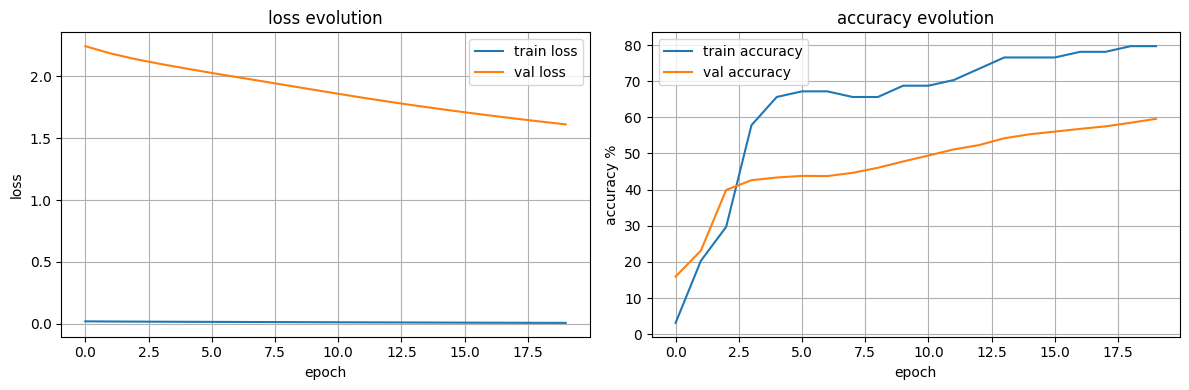

In [69]:
num_epoch = 20
lr = 0.001

model, metrics, val_preds, val_labels = train_model(model, loader_train,num_epoch,lr)
plot_training_metrics(metrics)


plutot bien mais faut plus d'epoch 

starting training

epoch 1/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 92.20it/s, Loss=1.57, Acc=61.1] 


epoch 2/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 143.17it/s, Loss=1.54, Acc=61.5]


epoch 3/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 289.08it/s, Loss=1.52, Acc=62.1]


epoch 4/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 275.49it/s, Loss=1.49, Acc=62.9]


epoch 5/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 264.65it/s, Loss=1.47, Acc=63.6]


epoch 6/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 290.41it/s, Loss=1.45, Acc=64.2]


epoch 7/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 248.83it/s, Loss=1.44, Acc=64.5]


epoch 8/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 273.20it/s, Loss=1.43, Acc=65]  


epoch 9/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 321.24it/s, Loss=1.41, Acc=65.8]


epoch 10/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 283.51it/s, Loss=1.41, Acc=66.4]


epoch 11/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 280.07it/s, Loss=1.4, Acc=66.8] 


epoch 12/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 253.04it/s, Loss=1.39, Acc=67.4]


epoch 13/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 257.89it/s, Loss=1.38, Acc=67.6]


epoch 14/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 289.90it/s, Loss=1.38, Acc=68]  


epoch 15/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 273.27it/s, Loss=1.38, Acc=68.5]


epoch 16/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 269.77it/s, Loss=1.38, Acc=68.8]


epoch 17/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 259.48it/s, Loss=1.38, Acc=69]  


epoch 18/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 263.52it/s, Loss=1.38, Acc=69.1]


epoch 19/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 148.27it/s, Loss=1.38, Acc=69.5]


epoch 20/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 345.07it/s, Loss=1.38, Acc=69.7]


epoch 21/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 280.62it/s, Loss=1.38, Acc=69.8]


epoch 22/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 170.20it/s, Loss=1.39, Acc=70.2]


epoch 23/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 98.54it/s, Loss=1.39, Acc=70.5] 


epoch 24/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 126.26it/s, Loss=1.4, Acc=70.6] 


epoch 25/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 263.51it/s, Loss=1.4, Acc=70.7] 


epoch 26/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 183.99it/s, Loss=1.41, Acc=70.7]


epoch 27/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 292.56it/s, Loss=1.41, Acc=70.8]


epoch 28/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 267.58it/s, Loss=1.42, Acc=70.9]


epoch 29/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 262.35it/s, Loss=1.43, Acc=70.9]


epoch 30/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 310.63it/s, Loss=1.44, Acc=70.8]


epoch 31/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 58.35it/s, Loss=1.44, Acc=70.9] 


epoch 32/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 253.70it/s, Loss=1.45, Acc=70.9]


epoch 33/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 277.14it/s, Loss=1.46, Acc=70.8]


epoch 34/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 280.63it/s, Loss=1.47, Acc=71]  


epoch 35/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 263.38it/s, Loss=1.48, Acc=71.1]


epoch 36/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 207.34it/s, Loss=1.49, Acc=71]  


epoch 37/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 232.09it/s, Loss=1.5, Acc=71]   


epoch 38/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 310.42it/s, Loss=1.5, Acc=70.9] 


epoch 39/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 390.96it/s, Loss=1.51, Acc=70.9]


epoch 40/40:


Validation: 100%|██████████| 32/32 [00:00<00:00, 383.14it/s, Loss=1.52, Acc=71]


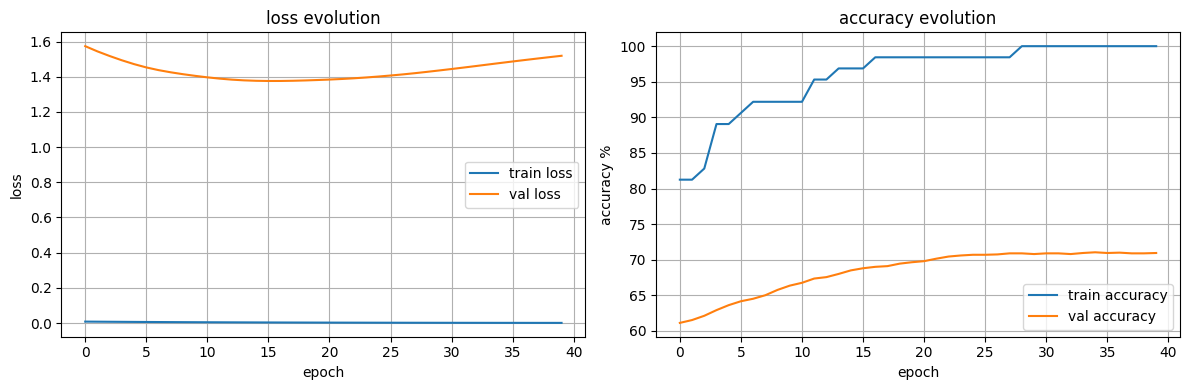

In [70]:
num_epoch = 40
lr = 0.001

model, metrics, val_preds, val_labels = train_model(model, loader_train,num_epoch,lr)
plot_training_metrics(metrics)


sur apprentissage, eval loss augmente, train accuracy 100 % mais val accuracy n'augmente pas, par contre val accuracy 70% 


starting training

epoch 1/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 79.76it/s, Loss=3.87, Acc=55.1]


epoch 2/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 122.28it/s, Loss=2.89, Acc=70] 


epoch 3/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 277.52it/s, Loss=3.4, Acc=64.2] 


epoch 4/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 244.02it/s, Loss=3.43, Acc=64.7]


epoch 5/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 266.92it/s, Loss=3.2, Acc=66.1] 


epoch 6/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 86.36it/s, Loss=3.09, Acc=67.4] 


epoch 7/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 238.03it/s, Loss=3.11, Acc=67.5]


epoch 8/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 141.58it/s, Loss=3.23, Acc=65.9]


epoch 9/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 224.00it/s, Loss=3.39, Acc=64.1]


epoch 10/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 96.69it/s, Loss=3.49, Acc=63.4]


epoch 11/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 163.02it/s, Loss=3.52, Acc=64]  


epoch 12/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 281.54it/s, Loss=3.54, Acc=64.7]


epoch 13/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 299.98it/s, Loss=3.59, Acc=64.9]


epoch 14/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 323.49it/s, Loss=3.64, Acc=65.1]


epoch 15/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 314.52it/s, Loss=3.71, Acc=64.7]


epoch 16/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 210.44it/s, Loss=3.78, Acc=64.6]


epoch 17/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 351.19it/s, Loss=3.85, Acc=64.4]


epoch 18/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 368.79it/s, Loss=3.9, Acc=64.7]


epoch 19/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 240.85it/s, Loss=3.93, Acc=64.6]


epoch 20/20:


Validation: 100%|██████████| 32/32 [00:00<00:00, 59.76it/s, Loss=3.94, Acc=64.5]


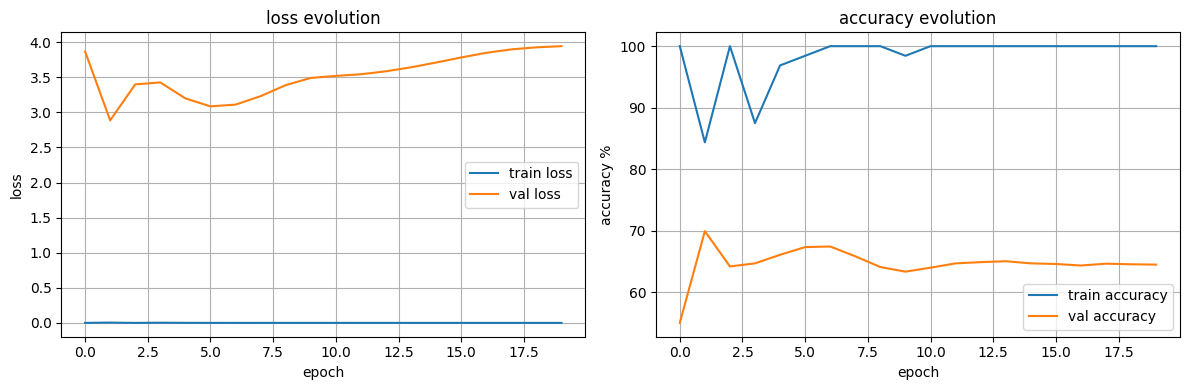

In [ ]:
num_epoch = 20
lr = 0.01

model, metrics, val_preds, val_labels = train_model(model, loader_train,num_epoch,lr)
plot_training_metrics(metrics)


learning rate trop eleve, instable, sur apprentissage

starting training

epoch 1/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 412.18it/s, Loss=4.22, Acc=67.5]


epoch 2/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 498.72it/s, Loss=4.33, Acc=67.6]


epoch 3/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 448.25it/s, Loss=4.59, Acc=67.4]


epoch 4/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 238.11it/s, Loss=4.8, Acc=67.4]


epoch 5/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 335.44it/s, Loss=4.92, Acc=67.6]


epoch 6/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 607.26it/s, Loss=5.09, Acc=66.7]


epoch 7/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 634.18it/s, Loss=5.13, Acc=66.9]


epoch 8/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 536.93it/s, Loss=5, Acc=67.4]


epoch 9/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 604.93it/s, Loss=5.04, Acc=67.4]


epoch 10/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 675.76it/s, Loss=5.25, Acc=67.2]


epoch 11/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 728.15it/s, Loss=5.47, Acc=66.8]


epoch 12/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 223.08it/s, Loss=5.68, Acc=66.1]


epoch 13/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 447.08it/s, Loss=5.82, Acc=66]


epoch 14/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 501.74it/s, Loss=5.89, Acc=66.1]


epoch 15/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 405.93it/s, Loss=5.87, Acc=66.1]


epoch 16/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 553.69it/s, Loss=5.82, Acc=66.4]


epoch 17/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 357.67it/s, Loss=5.76, Acc=66.8]


epoch 18/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 241.36it/s, Loss=5.71, Acc=67]  


epoch 19/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 503.73it/s, Loss=5.66, Acc=67.6]


epoch 20/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 612.29it/s, Loss=5.62, Acc=67.8]


epoch 21/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 564.33it/s, Loss=5.58, Acc=67.8]


epoch 22/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 627.53it/s, Loss=5.54, Acc=68.2]


epoch 23/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 650.52it/s, Loss=5.51, Acc=68.5]


epoch 24/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 619.78it/s, Loss=5.49, Acc=68.5]


epoch 25/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 632.60it/s, Loss=5.47, Acc=68.7]


epoch 26/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 589.89it/s, Loss=5.46, Acc=68.5]


epoch 27/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 617.44it/s, Loss=5.45, Acc=68.5]


epoch 28/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 561.71it/s, Loss=5.44, Acc=68.5]


epoch 29/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 249.95it/s, Loss=5.44, Acc=68.5]


epoch 30/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 232.04it/s, Loss=5.44, Acc=68.4]


epoch 31/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 409.01it/s, Loss=5.44, Acc=68.4]


epoch 32/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 436.16it/s, Loss=5.44, Acc=68.4]


epoch 33/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 409.82it/s, Loss=5.44, Acc=68.3]


epoch 34/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 436.95it/s, Loss=5.45, Acc=68.1]


epoch 35/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 259.30it/s, Loss=5.45, Acc=68.1]


epoch 36/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 113.30it/s, Loss=5.45, Acc=68.2]


epoch 37/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 165.86it/s, Loss=5.46, Acc=68.2]


epoch 38/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 568.56it/s, Loss=5.47, Acc=68.2]


epoch 39/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 627.85it/s, Loss=5.47, Acc=68.4]


epoch 40/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 667.50it/s, Loss=5.47, Acc=68.4]


epoch 41/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 227.25it/s, Loss=5.47, Acc=68.4]


epoch 42/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 333.00it/s, Loss=5.47, Acc=68.4]


epoch 43/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 330.74it/s, Loss=5.47, Acc=68.4]


epoch 44/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 629.03it/s, Loss=5.47, Acc=68.5]


epoch 45/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 539.89it/s, Loss=5.47, Acc=68.4]


epoch 46/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 592.45it/s, Loss=5.47, Acc=68.5]


epoch 47/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 602.84it/s, Loss=5.48, Acc=68.4]


epoch 48/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 287.73it/s, Loss=5.48, Acc=68.5]


epoch 49/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 402.10it/s, Loss=5.48, Acc=68.5]


epoch 50/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 532.98it/s, Loss=5.48, Acc=68.5]


epoch 51/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 603.77it/s, Loss=5.48, Acc=68.5]


epoch 52/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 550.80it/s, Loss=5.48, Acc=68.4]


epoch 53/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 530.80it/s, Loss=5.48, Acc=68.4]


epoch 54/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 360.07it/s, Loss=5.48, Acc=68.4]


epoch 55/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 522.83it/s, Loss=5.48, Acc=68.5]


epoch 56/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 283.15it/s, Loss=5.48, Acc=68.5]


epoch 57/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 486.89it/s, Loss=5.47, Acc=68.6]


epoch 58/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 609.87it/s, Loss=5.47, Acc=68.6]


epoch 59/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 589.89it/s, Loss=5.47, Acc=68.6]


epoch 60/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 531.33it/s, Loss=5.47, Acc=68.5]


epoch 61/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 549.99it/s, Loss=5.47, Acc=68.7]


epoch 62/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 599.35it/s, Loss=5.47, Acc=68.7]


epoch 63/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 661.74it/s, Loss=5.47, Acc=68.6]


epoch 64/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 606.05it/s, Loss=5.47, Acc=68.6]


epoch 65/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 518.76it/s, Loss=5.47, Acc=68.6]


epoch 66/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 606.64it/s, Loss=5.47, Acc=68.6]


epoch 67/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 547.77it/s, Loss=5.47, Acc=68.6]


epoch 68/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 660.46it/s, Loss=5.47, Acc=68.6]


epoch 69/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 634.01it/s, Loss=5.47, Acc=68.6]


epoch 70/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 643.55it/s, Loss=5.47, Acc=68.5]


epoch 71/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 611.55it/s, Loss=5.47, Acc=68.5]


epoch 72/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 607.88it/s, Loss=5.47, Acc=68.5]


epoch 73/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 584.45it/s, Loss=5.46, Acc=68.5]


epoch 74/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 605.59it/s, Loss=5.46, Acc=68.6]


epoch 75/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 661.98it/s, Loss=5.46, Acc=68.6]


epoch 76/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 673.55it/s, Loss=5.46, Acc=68.5]


epoch 77/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 302.00it/s, Loss=5.46, Acc=68.6]


epoch 78/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 603.80it/s, Loss=5.46, Acc=68.6]


epoch 79/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 505.87it/s, Loss=5.46, Acc=68.6]


epoch 80/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 105.36it/s, Loss=5.45, Acc=68.6]


epoch 81/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 567.67it/s, Loss=5.45, Acc=68.6]


epoch 82/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 658.57it/s, Loss=5.45, Acc=68.6]


epoch 83/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 633.74it/s, Loss=5.45, Acc=68.6]


epoch 84/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 609.93it/s, Loss=5.44, Acc=68.6]


epoch 85/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 583.05it/s, Loss=5.44, Acc=68.6]


epoch 86/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 604.75it/s, Loss=5.44, Acc=68.6]


epoch 87/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 681.44it/s, Loss=5.43, Acc=68.6]


epoch 88/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 588.27it/s, Loss=5.43, Acc=68.6]


epoch 89/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 673.28it/s, Loss=5.43, Acc=68.6]


epoch 90/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 369.56it/s, Loss=5.42, Acc=68.6]


epoch 91/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 285.42it/s, Loss=5.42, Acc=68.5]


epoch 92/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 506.43it/s, Loss=5.41, Acc=68.5]


epoch 93/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 421.34it/s, Loss=5.41, Acc=68.5]


epoch 94/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 248.85it/s, Loss=5.4, Acc=68.5] 


epoch 95/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 397.73it/s, Loss=5.4, Acc=68.5]


epoch 96/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 407.36it/s, Loss=5.39, Acc=68.4]


epoch 97/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 530.03it/s, Loss=5.38, Acc=68.4]


epoch 98/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 418.79it/s, Loss=5.38, Acc=68.4]


epoch 99/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 447.40it/s, Loss=5.37, Acc=68.4]


epoch 100/100:


Validation: 100%|██████████| 32/32 [00:00<00:00, 238.88it/s, Loss=5.37, Acc=68.4]


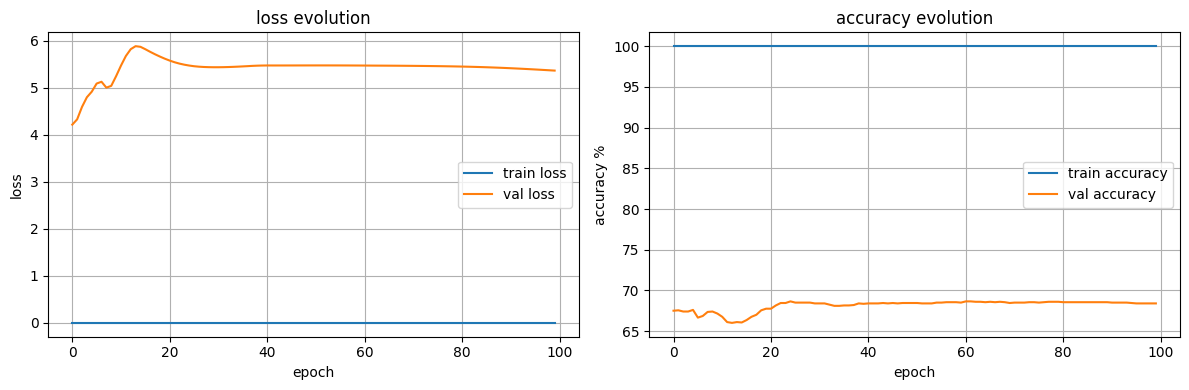

In [80]:
num_epoch = 100
lr = 0.005

model, metrics, val_preds, val_labels = train_model(model, loader_train,num_epoch,lr)
plot_training_metrics(metrics)


lr tres basse donc tres lent, plateau 

Adapter la boucle d’entraînement pour conserver les valeurs des loss et
des accuracys au cours des epochs.

Conclure en commentant les informations qu’on peut tirer de ces courbes.

## Question 4 - *Hyperparamètres*

On va maintenant explorer les hyperparamètres. On aura donc beaucoup
d’expériences à analyser et pour lesquelles on voudra stocker des
courbes et des modèles.

Simplifier la gestion de la boucle de train avec torch-lighning.

In [81]:
import pytorch_lightning as pl
import torch.nn.functional as F
import torch.optim as optim

class LitSimpleMLP(pl.LightningModule, MLP):
    def __init__(self, inputSize=256, hidden_size=100, outputSize=10, lr=1e-3):
        pl.LightningModule.__init__(self)
        MLP.__init__(self, inputSize=inputSize, hidden_size=hidden_size, outputSize=outputSize)
        self.lr = lr

    def training_step(self, batch, batch_idx):
        images, labels = batch  # batch comes from data loader
        outputs = self(images)  
        loss = F.cross_entropy(outputs, labels)
        preds = outputs.argmax(dim=1)
        acc = (preds == labels).float().mean()

        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True)
        self.log("train_acc", acc, on_step=True, on_epoch=True, prog_bar=True)

        return loss                      

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)
        preds = outputs.argmax(dim=1)
        acc = (preds == labels).float().mean()

        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("val_acc", acc, on_step=False, on_epoch=True, prog_bar=True)

        return loss


    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.lr)
        return optimizer


In [ ]:
from pytorch_lightning import Trainer

lit_model = LitSimpleMLP(lr=1e-3)

trainer = Trainer(
    max_epochs=10,
    accelerator="auto",   # chooses cpu/gpu 
    devices="auto",
)

trainer.fit(lit_model, loader_train, loader_val)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/pytorch_lightning/utilities/_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.
/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=17` in the `DataLoader` to improve performance.
/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=17` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [83]:
import mlflow
import mlflow.pytorch
from pytorch_lightning.loggers import MLFlowLogger

def run_experiment(hidden_size, lr, num_epochs=10, batch_size=64, run_name="usps_mlp_test"):
    # log the hyperparams in mlflow
    with mlflow.start_run(run_name=run_name):
        mlflow.log_params({
            "hidden_size": hidden_size,
            "lr": lr,
            "batch_size": batch_size,
            "num_epochs": num_epochs,
            "input_size": 256,
            "output_size": 10
        })
        
        # lightning auto logs metrics for mlflow
        mlflow_logger = MLFlowLogger(experiment_name="USPS_MLP_Experiments", tracking_uri="http://localhost:5000")
        
        lit_model = LitSimpleMLP(hidden_size=hidden_size, lr=lr)
        
        trainer = Trainer(
            max_epochs=num_epochs,
            accelerator="auto",
            devices=1,
            logger=mlflow_logger,           
            enable_checkpointing=True,      # saves the best model
        )
        
        trainer.fit(lit_model, loader_train, loader_val)
        
        # saves the final model
        mlflow.pytorch.log_model(lit_model, "final_model")
        
        # log final metrics
        val_metrics = trainer.callback_metrics
        mlflow.log_metrics({
            "final_val_acc": val_metrics.get("val_acc", 0.0),
            "final_val_loss": val_metrics.get("val_loss", 0.0)
        })

# la campagne experimentale
hyperparams_grid = [
    {"hidden_size": 100, "lr": 0.001},
    {"hidden_size": 100, "lr": 0.003},
    {"hidden_size": 200, "lr": 0.001},
    {"hidden_size": 200, "lr": 0.003},
    {"hidden_size": 50, "lr": 0.001},
]

print("campagne mlflow")
for i, hparams in enumerate(hyperparams_grid):
    print(f"run {i+1}: hidden_size={hparams['hidden_size']}, lr={hparams['lr']}")
    run_experiment(
        hidden_size=hparams["hidden_size"],
        lr=hparams["lr"],
        num_epochs=5,  
        run_name=f"usps_h{hparams['hidden_size']}_lr{hparams['lr']}"
    )

print("campagne ended")
#lancer mlflow ui --port 5000 en terminal puis http://localhost:5000



campagne mlflow
run 1: hidden_size=100, lr=0.001


2026/02/12 00:01:07 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/12 00:01:07 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/12 00:01:07 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/12 00:01:07 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/12 00:01:07 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/12 00:01:07 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/12 00:01:07 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/12 00:01:07 INFO mlflow.store.db.utils: Updating database tables
2026/02/12 00:01:07 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/12 00:01:07 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/02/12 00:01:07 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/02/12 00:0

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/pytorch_lightning/utilities/_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.
/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=17` in the `DataLoader` to improve performance.
/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=17` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
2026/02/12 00:05:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run powerful-lark-719 at: http://localhost:5000/#/experiments/1/runs/0662b679debb4bea8ee7fb4180f0e203
🧪 View experiment at: http://localhost:5000/#/experiments/1


2026/02/12 00:05:23 WARNING mlflow.pytorch: Saving pytorch model by Pickle or CloudPickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is to set 'export_model' to True to save the pytorch model using the safe graph model format.
2026/02/12 00:05:23 WARNING mlflow.utils.requirements_utils: Found torch version (2.10.0+cpu) contains a local version label (+cpu). MLflow logged a pip requirement for this package as 'torch==2.10.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2026/02/12 00:05:28 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.25.0+cpu) contains a local version label (+cpu). MLflow logged a pip requirement for this package as 'torchvision==0.25.0' without the local version label to

🏃 View run usps_h100_lr0.001 at: http://localhost:5000/#/experiments/0/runs/ef32d488562a4b7a8ff8dd031d673683
🧪 View experiment at: http://localhost:5000/#/experiments/0
run 2: hidden_size=100, lr=0.003



  | Name | Type   | Params | Mode  | FLOPs
------------------------------------------------
0 | fc1  | Linear | 25.7 K | train | 0    
1 | fc2  | Linear | 1.0 K  | train | 0    
------------------------------------------------
26.7 K    Trainable params
0         Non-trainable params
26.7 K    Total params
0.107     Total estimated model params size (MB)
2         Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
2026/02/12 00:05:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run gregarious-wolf-472 at: http://localhost:5000/#/experiments/1/runs/5fd28181fb464ecd8d6074917507edb2
🧪 View experiment at: http://localhost:5000/#/experiments/1


2026/02/12 00:05:33 WARNING mlflow.pytorch: Saving pytorch model by Pickle or CloudPickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is to set 'export_model' to True to save the pytorch model using the safe graph model format.
2026/02/12 00:05:33 WARNING mlflow.utils.requirements_utils: Found torch version (2.10.0+cpu) contains a local version label (+cpu). MLflow logged a pip requirement for this package as 'torch==2.10.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2026/02/12 00:05:37 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.25.0+cpu) contains a local version label (+cpu). MLflow logged a pip requirement for this package as 'torchvision==0.25.0' without the local version label to

🏃 View run usps_h100_lr0.003 at: http://localhost:5000/#/experiments/0/runs/8b8803cbfb044ec9999c80c56a07ad31
🧪 View experiment at: http://localhost:5000/#/experiments/0
run 3: hidden_size=200, lr=0.001



  | Name | Type   | Params | Mode  | FLOPs
------------------------------------------------
0 | fc1  | Linear | 51.4 K | train | 0    
1 | fc2  | Linear | 2.0 K  | train | 0    
------------------------------------------------
53.4 K    Trainable params
0         Non-trainable params
53.4 K    Total params
0.214     Total estimated model params size (MB)
2         Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
2026/02/12 00:05:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run nosy-stoat-173 at: http://localhost:5000/#/experiments/1/runs/bbd82b99cd964f97bebe3f11402f99e0
🧪 View experiment at: http://localhost:5000/#/experiments/1


2026/02/12 00:05:43 WARNING mlflow.pytorch: Saving pytorch model by Pickle or CloudPickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is to set 'export_model' to True to save the pytorch model using the safe graph model format.
2026/02/12 00:05:43 WARNING mlflow.utils.requirements_utils: Found torch version (2.10.0+cpu) contains a local version label (+cpu). MLflow logged a pip requirement for this package as 'torch==2.10.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2026/02/12 00:05:47 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.25.0+cpu) contains a local version label (+cpu). MLflow logged a pip requirement for this package as 'torchvision==0.25.0' without the local version label to

🏃 View run usps_h200_lr0.001 at: http://localhost:5000/#/experiments/0/runs/7fcd1f9a41b54e74b64fda96fd6492aa
🧪 View experiment at: http://localhost:5000/#/experiments/0
run 4: hidden_size=200, lr=0.003



  | Name | Type   | Params | Mode  | FLOPs
------------------------------------------------
0 | fc1  | Linear | 51.4 K | train | 0    
1 | fc2  | Linear | 2.0 K  | train | 0    
------------------------------------------------
53.4 K    Trainable params
0         Non-trainable params
53.4 K    Total params
0.214     Total estimated model params size (MB)
2         Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
2026/02/12 00:05:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run melodic-swan-434 at: http://localhost:5000/#/experiments/1/runs/0f446ce835a9473dbf0396b4525d0aa6
🧪 View experiment at: http://localhost:5000/#/experiments/1


2026/02/12 00:05:53 WARNING mlflow.pytorch: Saving pytorch model by Pickle or CloudPickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is to set 'export_model' to True to save the pytorch model using the safe graph model format.
2026/02/12 00:05:53 WARNING mlflow.utils.requirements_utils: Found torch version (2.10.0+cpu) contains a local version label (+cpu). MLflow logged a pip requirement for this package as 'torch==2.10.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2026/02/12 00:05:57 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.25.0+cpu) contains a local version label (+cpu). MLflow logged a pip requirement for this package as 'torchvision==0.25.0' without the local version label to

🏃 View run usps_h200_lr0.003 at: http://localhost:5000/#/experiments/0/runs/59f0a47e38504aac9d0e6f4ed303230d
🧪 View experiment at: http://localhost:5000/#/experiments/0
run 5: hidden_size=50, lr=0.001



  | Name | Type   | Params | Mode  | FLOPs
------------------------------------------------
0 | fc1  | Linear | 12.8 K | train | 0    
1 | fc2  | Linear | 510    | train | 0    
------------------------------------------------
13.4 K    Trainable params
0         Non-trainable params
13.4 K    Total params
0.053     Total estimated model params size (MB)
2         Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
2026/02/12 00:06:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run intelligent-fish-592 at: http://localhost:5000/#/experiments/1/runs/27bb95af3cec4b8f890a05cd9828689a
🧪 View experiment at: http://localhost:5000/#/experiments/1


2026/02/12 00:06:03 WARNING mlflow.pytorch: Saving pytorch model by Pickle or CloudPickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is to set 'export_model' to True to save the pytorch model using the safe graph model format.
2026/02/12 00:06:03 WARNING mlflow.utils.requirements_utils: Found torch version (2.10.0+cpu) contains a local version label (+cpu). MLflow logged a pip requirement for this package as 'torch==2.10.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2026/02/12 00:06:07 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.25.0+cpu) contains a local version label (+cpu). MLflow logged a pip requirement for this package as 'torchvision==0.25.0' without the local version label to

🏃 View run usps_h50_lr0.001 at: http://localhost:5000/#/experiments/0/runs/0bc0c51eead74d26a47a3a2fad0cf2f9
🧪 View experiment at: http://localhost:5000/#/experiments/0
campagne ended


In [ ]:
# mlflow est tres cool. je reussi a avoir un run avec : 

# final_val_acc = 0.9312406778335571
# final_val_loss = 0.27695712447166443 

# avec les hyper params:

#hidden_size = 200
#lr = 0.001
#batch_size = 64
#num_epochs = 5
#input_size = 256
#output_size = 10

Ajouter une instrumentation avec `MLflow` pour conserver les
hyperparamètres, les courbes, les valeurs et les modèles.

Lancer une campagne expérimentale et analyser les résultats dans
l’interface `MLflow`.

# Exercice 2 - *Perceptron* *et* *images*

On va encore travailler sur le dataset USPS, mais cette fois avec un
simple perceptron. L’objectif est d’interpréter les valeurs des poids à
l’issu de l’apprentissage.

## Question 5 - *Modèle* *encore* *plus* *simple*

Construire un percetron (donc sans couche cachée), pour la
classification sur USPS.

In [84]:
class Perceptron(nn.Module):
    def __init__(self, inputSize=256, outputSize=10):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(inputSize, outputSize) 
        
    def forward(self, x):
        x = x.view(x.size(0), -1)  # flatten to (batch_size, 256)
        x = self.fc(x) 
        return x


Entraîner le modèle (en allant au plus simple).

In [85]:
model = Perceptron()
print(model)
total_params = sum(p.numel() for p in model.parameters())
print(f"total params: {total_params}")

model_trained, metrics, val_preds, val_labels = train_model(model, loader_train, 5, lr=0.01)

Perceptron(
  (fc): Linear(in_features=256, out_features=10, bias=True)
)
total params: 2570
starting training

epoch 1/5:


Validation: 100%|██████████| 32/32 [00:00<00:00, 279.35it/s, Loss=2.32, Acc=22.6]


epoch 2/5:


Validation: 100%|██████████| 32/32 [00:00<00:00, 456.63it/s, Loss=2.27, Acc=34.2]


epoch 3/5:


Validation: 100%|██████████| 32/32 [00:00<00:00, 550.06it/s, Loss=2.15, Acc=52.6]


epoch 4/5:


Validation: 100%|██████████| 32/32 [00:00<00:00, 165.96it/s, Loss=2.02, Acc=60.8]


epoch 5/5:


Validation: 100%|██████████| 32/32 [00:00<00:00, 540.56it/s, Loss=1.95, Acc=63.5]


train acc: 78.12%
val acc: 63.53%


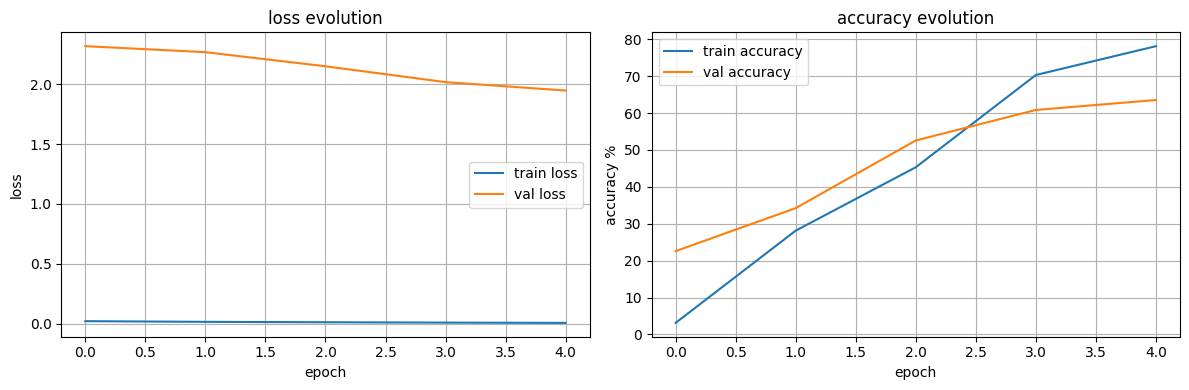


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       359
           1       0.75      0.97      0.85       264
           2       0.97      0.19      0.32       198
           3       0.41      0.91      0.56       166
           4       0.65      0.81      0.73       200
           5       0.00      0.00      0.00       160
           6       0.89      0.85      0.87       170
           7       0.40      0.93      0.56       147
           8       0.65      0.57      0.60       166
           9       0.00      0.00      0.00       177

    accuracy                           0.64      2007
   macro avg       0.55      0.60      0.53      2007
weighted avg       0.60      0.64      0.57      2007



/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/alant/Documents/idle/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [87]:
print(f"train acc: {metrics['train_acc'][-1]:.2f}%")
print(f"val acc: {metrics['val_acc'][-1]:.2f}%")

plot_training_metrics(metrics)

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(val_labels, val_preds))


## Question 6 - *Analyse* *du* *modèle*

Visualiser les poids du modèles sous forme d’image.

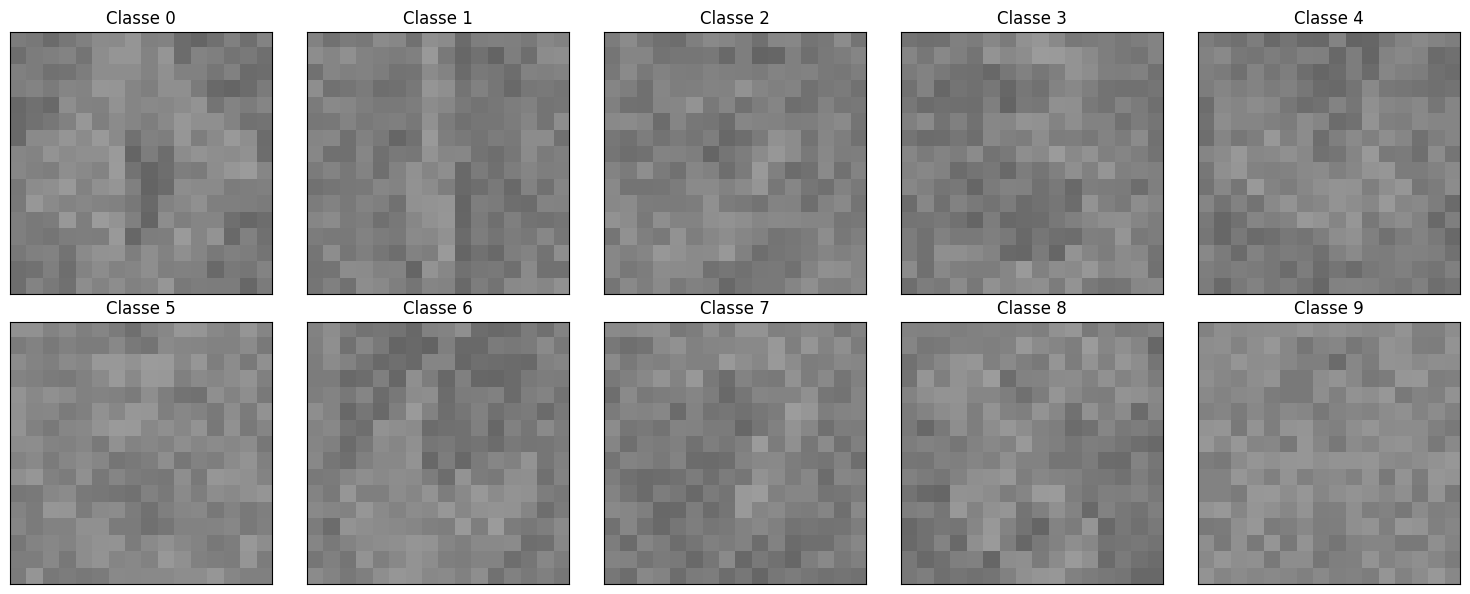

Biais par classe:
[ 0.04211359  0.00536193  0.0241374  -0.01438682  0.07947266  0.00729
 -0.04809831  0.04397585  0.03060376 -0.06870213]


In [ ]:
def visualize_perceptron_weights(model, classes=10):
    weights = model.fc.weight.data.cpu().numpy()  # shape: (10, 256)
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()
    
    for i in range(classes):
        w = weights[i].reshape(16, 16)  # reshape en 16x16
        
        axes[i].imshow(w, cmap='gray', vmin=-0.5, vmax=0.5)
        axes[i].set_title(f'Classe {i}')
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    
    plt.tight_layout()
    plt.show()

visualize_perceptron_weights(model_trained)

print("Biais par classe:")
print(model_trained.fc.bias.data.cpu().numpy())
# on peut voir les formes des chiffres dans les poids sous forme d'images

Conclure sur l’importance des différentes parties de l’image en fonction
de la classe.